# Predict House Prices Model

## Bussiness Problem

<p style="text-align: justify;">
A real estate company in California was facing a major challenge in determining accurate prices for the properties they were selling or buying. Improper pricing can have significant negative impacts, both in the form of financial losses and lost business opportunities. Pricing too high can make properties difficult to sell, resulting in inventory build-up and increased operating costs. Conversely, a price that is too low can lead to losses as the property is sold below its true market value, hurting the company in the long run.
</p>

## Problem Statement

<p style="text-align: justify;">
Real estate companies in California face challenges in accurately determining the sale and purchase price of properties, which can have a significant impact on financial returns and business opportunities. Improper pricing can result in properties selling below market value or staying on the market too long, resulting in additional costs and potential losses. Therefore, companies need a solution that can optimize the pricing process by leveraging historical data and predictive analytics.

How can we utilize historical property data in California to develop a predictive model that can accurately forecast the average price of a home? This model should consider various factors that affect property values, such as:
</p>

## Analytic approach

To address the housing price prediction project in California, the analytical approach involves an in-depth analysis of the housing market data in the region. The steps are as follows:

**Understanding the Dataset**: This stage involves studying the available dataset, including the existing variables and how they may affect housing prices.

**Data Exploration**: Exploratory data analysis is performed to identify patterns or trends that may exist within the dataset. Data visualization is often used to better understand the relationships between variables and housing prices.

**Data Cleaning**: This process involves identifying and rectifying missing values, outliers, or invalid data.

**Feature Engineering**: New features can be created from the existing data to enhance model performance.

**Model Selection**: Based on the characteristics of the housing price prediction task, several commonly used machine learning models include linear regression, KNN, ridge, decision tree, random forest, and XGBoost.

**Model Training and Evaluation**: Machine learning models are trained using the training data and evaluated using appropriate metrics.

**Results Interpretation**: The results from the machine learning models are evaluated to understand the key factors influencing housing prices in California.


# Goal 

<p style="text-align: justify;">
<ul>
    <li>Develop a regression model that can predict median home prices in California with a high degree of accuracy.</li>
    <li>Identify the factors that have the most influence on house prices in California.</li>
    <li>Provide a predictive tool that can be used by real estate professionals to assist in property pricing.</li>
    <li>Improve efficiency and accuracy in the property valuation process.</li>
    <li>Provide insights that can be used for strategic decision-making in property investment and real estate development.</li>

</ul>
</p>


# Metrics

> # EDA

In [1]:
# untuk manipulasi data
import pandas as pd
import numpy as np

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# untuk menghitung Variance Inflation Factor (VIF) dalam regresi linear
from statsmodels.stats.outliers_influence import variance_inflation_factor

# untuk normalisasi dan transformasi data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler

# untuk pembagian dataset dan validasi model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold,KFold, RandomizedSearchCV

# untuk membangun pipeline pemrosesan data dan model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# untuk model Decision Tree dan visualisasi pohon keputusan
from sklearn.tree import DecisionTreeRegressor, plot_tree

# use memory
from memory_profiler import memory_usage

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

# untuk mengabaikan peringatan yang tidak diinginkan
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_california = pd.read_csv('dataset/data_california_house.csv')
df_california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


> ## EDA

In [3]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [4]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

> Summary Statistic Descriptive

In [5]:
display(df_california.describe().T,
        df_california.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
longitude,14448.0,-119.566647,2.006587,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14448.0,35.630093,2.140121,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,14448.0,28.618702,12.596694,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14448.0,2640.132683,2191.612441,2.0000,1451.0000,2125.0000,3148.0000,32627.0000
total_bedrooms,14311.0,538.260709,423.577544,1.0000,295.0000,435.0000,647.0000,6445.0000
population,14448.0,1425.157323,1149.580157,3.0000,784.0000,1165.0000,1724.0000,35682.0000
households,14448.0,499.508929,383.098390,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14448.0,3.866667,1.891158,0.4999,2.5706,3.5391,4.7361,15.0001
median_house_value,14448.0,206824.624516,115365.476182,14999.0000,119600.0000,180000.0000,263900.0000,500001.0000


,count,unique,top,freq
ocean_proximity,14448,5,<1H OCEAN,6369


> Data Understanding (Conclusion)

Berdasarkan penelurusan yang telah dilakukan dapat diketahui bahwa :
1. Dataet mempunyai 10 kolom dan 14448 baris
2. Dataset hanya mempunyai kategorikal yaitu  'ocean_proximity' dimana kolom ini memuat lokasi rumah dari ocean/sea
3. Dataset mempunya missing value 137  baris dan missing value berada pada kolom 'total_bedrooms'

-

-

> # Exploratory Data Analysis(EDA)

> EDA 1 Histogram Numeric Column

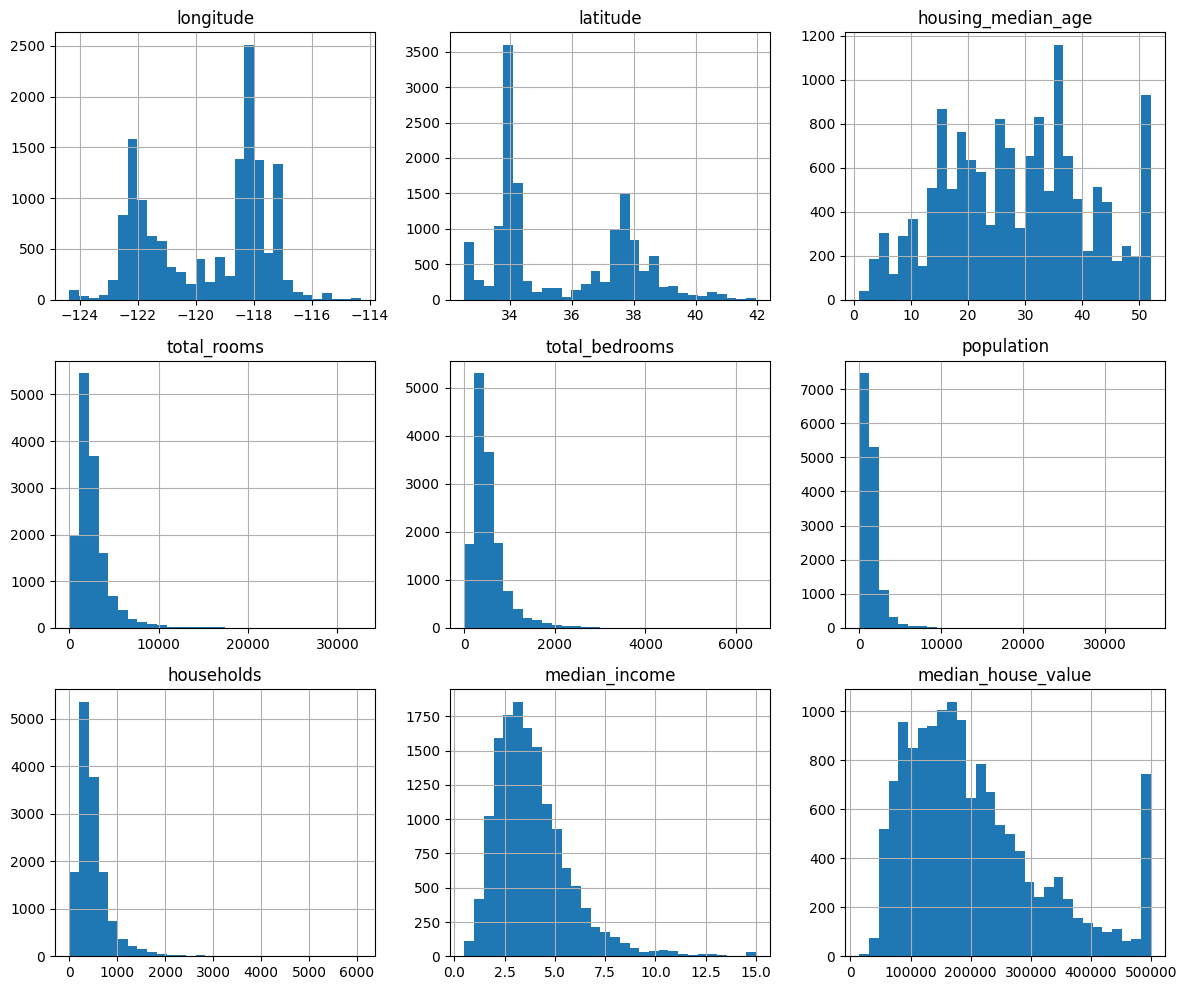

In [6]:
# Histogram from variable Numerik
df_california.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

> Corelation Metric

In [7]:
corelation = df_california.drop('ocean_proximity', axis=1).corr(method='spearman')
corelation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879491,-0.159119,0.053617,0.075678,0.135127,0.070564,-0.006842,-0.069389
latitude,-0.879491,1.000000,0.041108,-0.033410,-0.069869,-0.136729,-0.087238,-0.091646,-0.167250
housing_median_age,-0.159119,0.041108,1.000000,-0.363420,-0.314208,-0.288264,-0.289847,-0.148067,0.072069
total_rooms,0.053617,-0.033410,-0.363420,1.000000,0.916249,0.815582,0.907105,0.271127,0.199245
total_bedrooms,0.075678,-0.069869,-0.314208,0.916249,1.000000,0.870014,0.975877,-0.002529,0.081704
population,0.135127,-0.136729,-0.288264,0.815582,0.870014,1.000000,0.902576,0.005163,-0.001653
households,0.070564,-0.087238,-0.289847,0.907105,0.975877,0.902576,1.000000,0.032316,0.108217
median_income,-0.006842,-0.091646,-0.148067,0.271127,-0.002529,0.005163,0.032316,1.000000,0.680296
median_house_value,-0.069389,-0.167250,0.072069,0.199245,0.081704,-0.001653,0.108217,0.680296,1.000000


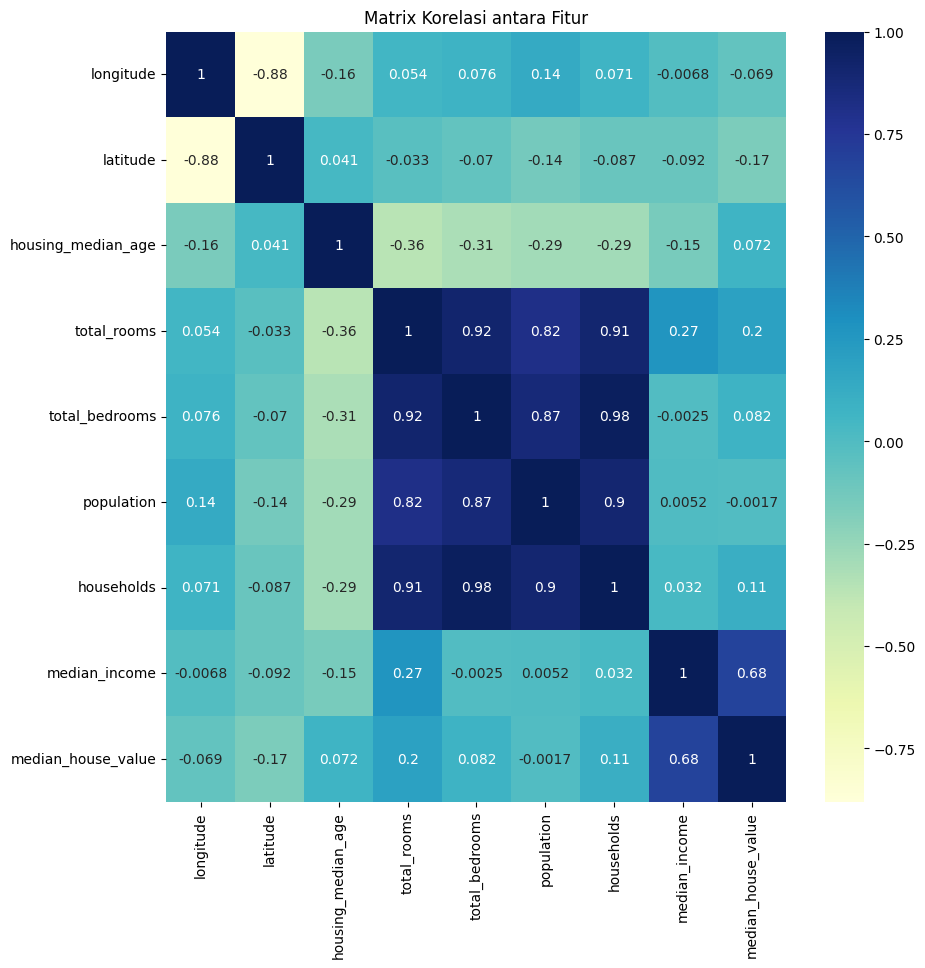

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation,annot=True,cmap='YlGnBu').set_title('Matrix Korelasi antara Fitur')
plt.show()

<p style="text-align: justify;"> 
Pada "Korelasi heatmap" dapat dilihat bahwa korelasi dengan median_house_value yang tertinggi adalah pada median_income. </p>

>Map median house value 

In [9]:
import matplotlib.image as mpimg

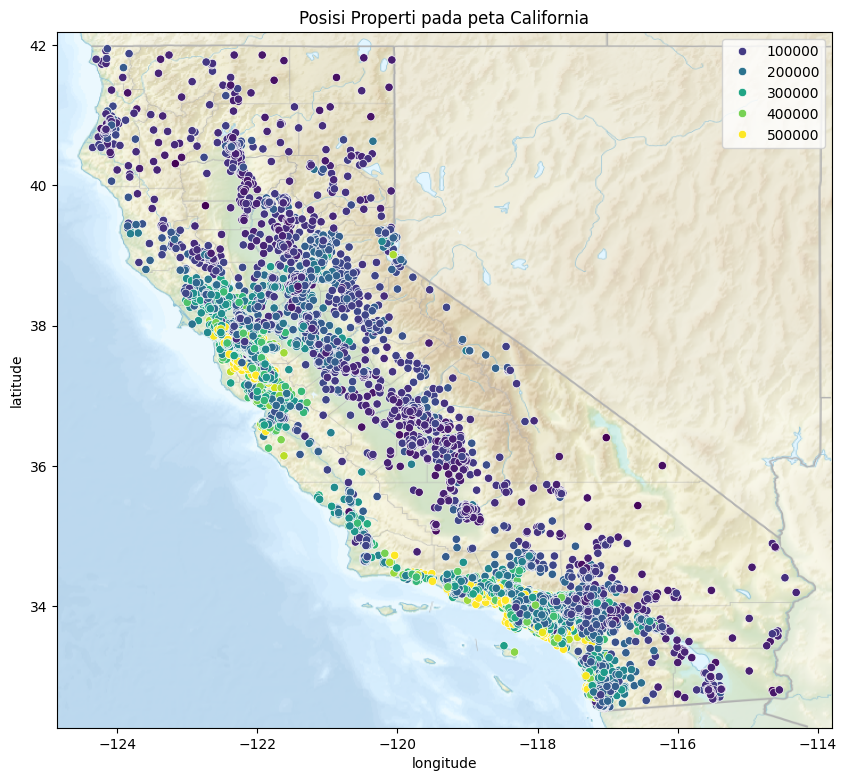

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_california, x="longitude", y="latitude", hue=df_california['median_house_value'],palette='viridis').set_title('Posisi Properti pada peta California')

# Asumsi bahwa 'dataset\california.png' adalah path yang benar ke gambar peta
california = mpimg.imread('dataset\california.png')
plt.imshow(california, extent=[-124.86, -113.8, 32.26, 42.19], alpha=0.5, cmap='jet')

# Menampilkan legenda
plt.legend()

plt.show()


<p style="text-align: justify;"> 
Peta sebaran porperti di california dengan harga nya</p>

> ## EDA Conclusion

Conclusion :
1. Pada Histogram kita dapatlihat distribusi setiap kolom numerik. Dapat kita lihat dua kolom 'housing_median_age' dan 'median_house_value' kedua kolom terdistribusi tidak normal danmemiliki data anomali. pada kolom 'median_house_value' ada lebih dari 600 properti dengan harga $500.001 serta kolom 'housing_median_age'  memiliki lebih dari 800 properti yang berusai 52 tahun.
2. Corelation Plot dengan graph ini dapat kita ketahui bagaimana korelasi fitur terhadap target 'median_house_value'. didapatkan bahwa kolom 'median_income' adalah fitur yang memiliki korelasi terkuat dengan 'median_house_value' dan arah korelasinya adalah positif, yang berarti semakin mahal harga propertinya semagin tinggi income pemiliknya. 
3. pada Map graph dapat dilihat penyebaran properti di seluruh daerah california. propertinya di wakili dengan dot, dimana dot memiliki warna yang mencerminkan harga properti semakin kuning warnanya semakin mahal harga propertitnya dan properti yang mahal berada di dekat garis pantai.

> ## Data PreProcessing

<p style="text-align: justify;"> 
Setelah data kita breakdown pada EDA, mari kita pre-process data-data nya agar sesuai dengan kebutuhan analisis serta pembuatan model. 
<br>
1. Duplicates
<br>
2. Missing Value
<br>
3. Outliers
 </p>


### Duplicate Data

In [11]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [12]:
df_california.duplicated().sum()

0

### Missing Value

In [13]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [14]:
df_california['total_bedrooms'].fillna(df_california['total_bedrooms'].median(), inplace=True)

Outlier Data

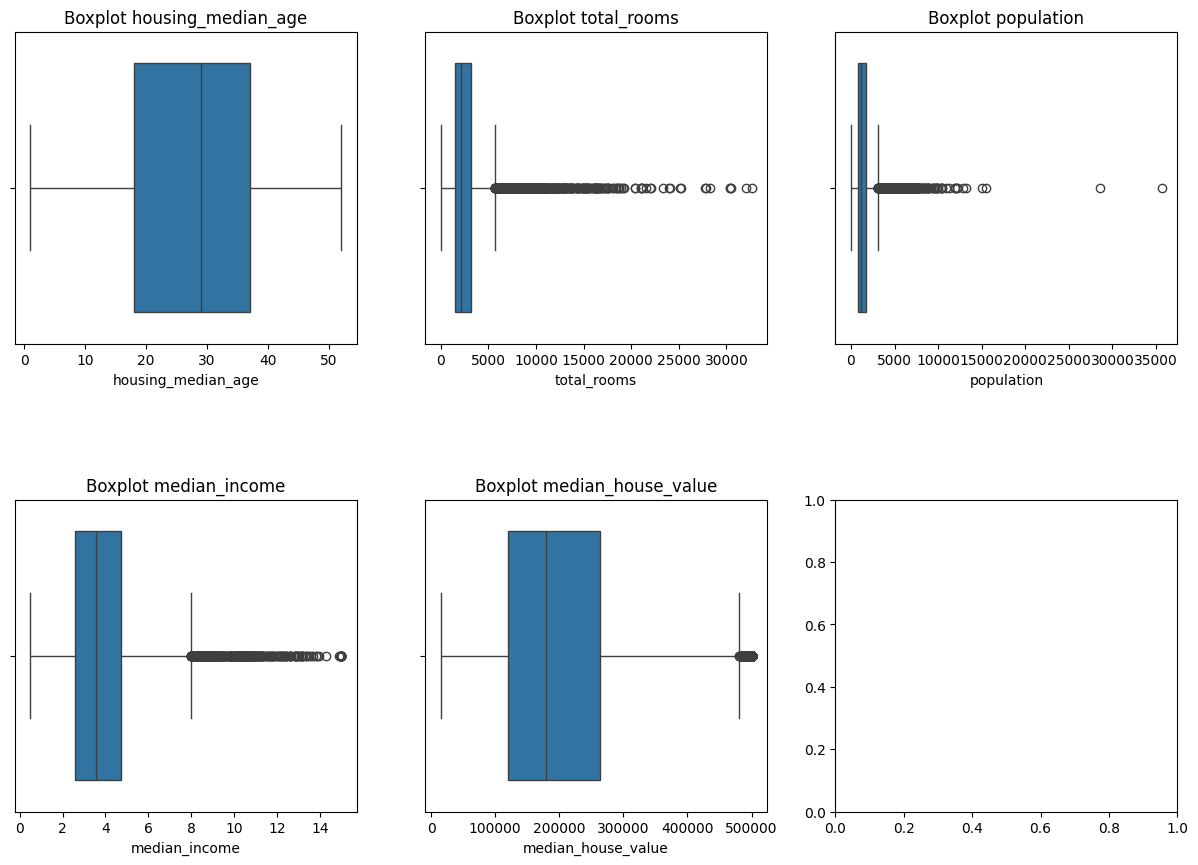

In [15]:
kolom = [ 'housing_median_age', 'total_rooms',
                    'population','median_income', 'median_house_value']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(bottom=0.1, hspace=0.5)

for i, col in enumerate(kolom):
    baris, kolom = divmod(i, 3)
    sns.boxplot(x=df_california[col], ax=axes[baris, kolom])
    axes[baris, kolom].set_title(f'Boxplot {col}')

Outlier yang ada merupakan bagian dari distribusi yang sebenarnya dan mencerminkan variabilitas alami dalam populasi, jika dihapus dapat menghilangkan informasi yang berharga.

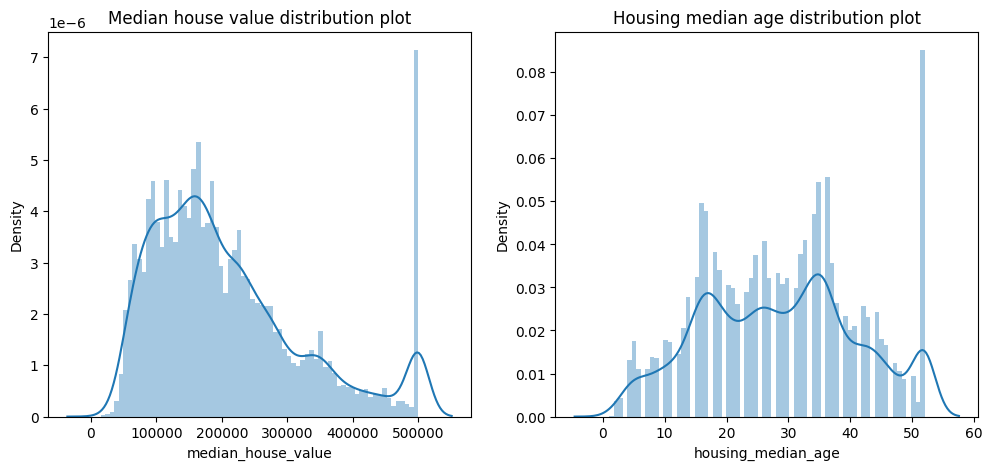

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_california['median_house_value'],kde=True,bins=70).set_title('Median house value distribution plot')
plt.subplot(1,2,2)
sns.distplot(df_california['housing_median_age'],kde=True,bins=70).set_title('Housing median age distribution plot')
plt.show()

Remove Outlier

In [17]:
df_california = df_california.query('median_house_value != 500001.0 and housing_median_age != 52.0')

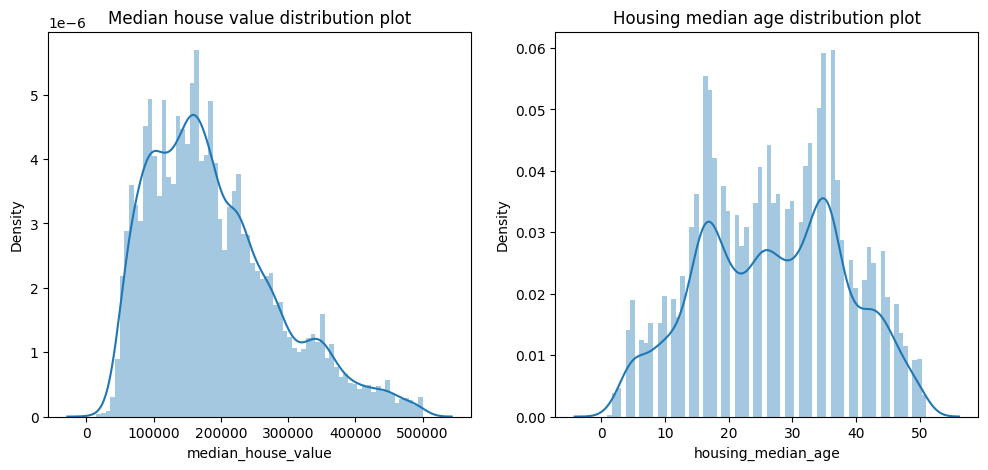

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_california['median_house_value'],kde=True,bins=70).set_title('Median house value distribution plot')
plt.subplot(1,2,2)
sns.distplot(df_california['housing_median_age'],kde=True,bins=70).set_title('Housing median age distribution plot')
plt.show()

> Conclusion

1. Duplicate Data : Tidak ada duplicate data pada dataset
2. Missing Value : Pada missing value yang ditemukan pada kolom 'total_bedrooms' diputuskan mengisi dengan median karena tidak terdistribusi secara normal dan terdapat outlier.
3. Outliers : Dalam dataset median_house_value, terdapat 678 data dengan nilai $500,001 yang dianggap tidak wajar. Hal ini kemungkinan merupakan kesalahan pencatatan atau pengumpulan data. Karena nilai tersebut tidak akurat, diputuskan untuk menghapusnya dari dataset. Selain itu, pada kolom housing_median_age, ada 896 properti dengan usia 52 tahun. Meskipun ini mungkin benar, ada kecurigaan bahwa rumah yang lebih tua dari 51 tahun dikelompokkan ke dalam kategori ini. Untuk menghindari bias dan memastikan konsistensi dalam model, data ini akan dihapus. Selain itu, diputuskan untuk mengubah data rumah berumur 51 tahun menjadi 50 tahun. Langkah ini bertujuan untuk menyederhanakan dan menstandarisasi dataset untuk keperluan machine learning, sehingga model yang dihasilkan lebih sederhana dan konsisten.

> # Feature Enginering

add new feature 

In [19]:
# df_california['rooms_per_household'] = df_california['total_rooms'] / df_california['households']
# df_california['population_per_household'] = df_california['population'] / df_california['households']


1. informasi tambahan mengenai ketersediaan ruang dalam perumahan. <br>
2. Rasio jumlah penduduk terhadap jumlah rumah tangga dapat memberikan indikasi kepadatan penduduk di suatu area. <br>
3. Rasio jumlah kamar tidur terhadap jumlah kamar total dapat menunjukkan seberapa banyak kamar tidur dibandingkan dengan ruang lain. <br>


In [20]:
# kolom = [ 'housing_median_age', 'total_rooms',
#                     'population','median_income', 'median_house_value','rooms_per_household','population_per_household']
# fig, axes = plt.subplots(3, 3, figsize=(15, 10))
# fig.subplots_adjust(bottom=0.1, hspace=0.5)

# for i, col in enumerate(kolom):
#     baris, kolom = divmod(i, 3)
#     sns.boxplot(x=df_california[col], ax=axes[baris, kolom])
#     axes[baris, kolom].set_title(f'Boxplot {col}')

In [21]:
df_california.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [22]:
from scipy.stats import mstats
# Winsorization function
def winsorize_series(series, lower_percentile=0.05, upper_percentile=0.95):
    return mstats.winsorize(series, limits=[lower_percentile, 1 - upper_percentile])
# Apply winsorization to each numeric feature
df_california['total_rooms'] = winsorize_series(df_california['total_rooms'])
df_california['population'] = winsorize_series(df_california['population'])
df_california['households'] = winsorize_series(df_california['households'])
df_california['median_income'] = winsorize_series(df_california['median_income'])
df_california['total_bedrooms'] = winsorize_series(df_california['total_bedrooms'])

# df_california['rooms_per_household'] = winsorize_series(df_california['rooms_per_household'])
# df_california['population_per_household'] = winsorize_series(df_california['population_per_household'])


In [24]:
# kolom = [ 'housing_median_age', 'total_rooms',
#                     'population','median_income', 'median_house_value','rooms_per_household','population_per_household']
# fig, axes = plt.subplots(3, 3, figsize=(15, 10))
# fig.subplots_adjust(bottom=0.1, hspace=0.5)

# for i, col in enumerate(kolom):
#     baris, kolom = divmod(i, 3)
#     sns.boxplot(x=df_california[col], ax=axes[baris, kolom])
#     axes[baris, kolom].set_title(f'Boxplot {col}')

In [28]:
# # Display the correlation matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 10))
# sns.heatmap(df_california[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
#        'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'rooms_per_household',
#        'population_per_household']].corr(method='spearman'), annot=True, cmap='coolwarm')
# plt.show()

> # Model

> save data

In [29]:
# df_california.to_csv('data_baru.csv')

In [30]:
# Memisahkan fitur dan target
feature = df_california.drop(['median_house_value'], axis=1)
target = df_california['median_house_value']


X = feature  
y = target   

>  Split dataset into training+validation and test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 2020)

> ## Data Transformation

In [32]:
# Memisahkan kolom numerik dan kategorikal
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Menentukan kolom yang akan di-scaling dan yang tidak
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('longitude')
numeric_features.remove('latitude')
exclude_scaling = ['longitude', 'latitude']
numeric_features_to_scale = [col for col in numeric_features if col not in exclude_scaling]
numeric_features

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [33]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer_longitude_latitude = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5))
])

In [34]:
# Fit OneHotEncoder on the combined data
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

In [35]:
# Pipeline untuk kolom numerik yang mencakup imputasi, transformasi log, dan scaling
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [36]:
# ColumnTransformer untuk menggabungkan semua pipeline
transformer = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('knn_imputer', imputer_longitude_latitude, exclude_scaling)
])


In [37]:
# Fit and transform the data
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [38]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.052632,-0.343876,-0.633636,-0.396304,-0.524096,0.968337,1.0,0.0,0.0,0.0,0.0,-118.68,34.27
1,-1.000000,0.269695,-0.030705,-0.046201,-0.069277,0.882676,0.0,1.0,0.0,0.0,0.0,-121.34,37.98
2,0.315789,-0.655549,-0.692254,-0.272074,-0.605422,0.297730,1.0,0.0,0.0,0.0,0.0,-121.84,37.34
3,-1.157895,-0.344451,-0.195394,-0.170431,-0.132530,0.066378,0.0,1.0,0.0,0.0,0.0,-121.90,38.02
4,-1.052632,2.384704,2.392184,2.261807,2.346386,-0.498413,0.0,1.0,0.0,0.0,0.0,-116.47,33.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,0.368421,-0.413456,-0.480112,-0.189938,-0.454819,-0.609414,0.0,1.0,0.0,0.0,0.0,-119.50,36.62
10396,-1.157895,1.125359,0.898814,0.524641,0.906627,-0.444391,0.0,1.0,0.0,0.0,0.0,-116.87,33.76
10397,-0.736842,2.286371,1.183531,1.303901,1.078313,0.974394,0.0,1.0,0.0,0.0,0.0,-119.58,36.83
10398,0.421053,-0.700978,-0.675506,-0.578029,-0.605422,0.349621,1.0,0.0,0.0,0.0,0.0,-118.32,33.91


In [39]:
transformer.transformers_

[('num',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('scaler', RobustScaler())]),
  ['housing_median_age',
   'total_rooms',
   'total_bedrooms',
   'population',
   'households',
   'median_income']),
 ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
 ('knn_imputer',
  Pipeline(steps=[('imputer', KNNImputer())]),
  ['longitude', 'latitude'])]

In [40]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity']),
                                ('knn_imputer',
                                 Pipeline(steps=[('imputer', KNNImputer())]),
                                 ['longitude', 'latitude'])])

In [41]:
transformer.transformers_[0][1]

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler())])

In [42]:
transformer.transformers_[0][1].get_feature_names_out()

array(['housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income'], dtype=object)

In [43]:
transformer.transformers_[1][1]

OneHotEncoder(handle_unknown='ignore')

In [44]:
transformer.transformers_[1][1].get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [45]:
transformer.transformers_[2][1]

Pipeline(steps=[('imputer', KNNImputer())])

In [46]:
transformer.transformers_[2][1].get_feature_names_out()

array(['longitude', 'latitude'], dtype=object)

In [47]:
num_features = transformer.transformers_[0][1].get_feature_names_out()
cat_features = transformer.transformers_[1][1].get_feature_names_out()
knn_features = transformer.transformers_[2][1].get_feature_names_out()
# Convert the arrays to lists and concatenate them
features = list(num_features) + list(cat_features) + list(knn_features)

# Display the combined feature names
print(features)

['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'longitude', 'latitude']


In [48]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude,latitude
0,-0.052632,-0.343876,-0.633636,-0.396304,-0.524096,0.968337,1.0,0.0,0.0,0.0,0.0,-118.68,34.27
1,-1.000000,0.269695,-0.030705,-0.046201,-0.069277,0.882676,0.0,1.0,0.0,0.0,0.0,-121.34,37.98
2,0.315789,-0.655549,-0.692254,-0.272074,-0.605422,0.297730,1.0,0.0,0.0,0.0,0.0,-121.84,37.34
3,-1.157895,-0.344451,-0.195394,-0.170431,-0.132530,0.066378,0.0,1.0,0.0,0.0,0.0,-121.90,38.02
4,-1.052632,2.384704,2.392184,2.261807,2.346386,-0.498413,0.0,1.0,0.0,0.0,0.0,-116.47,33.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,0.368421,-0.413456,-0.480112,-0.189938,-0.454819,-0.609414,0.0,1.0,0.0,0.0,0.0,-119.50,36.62
10396,-1.157895,1.125359,0.898814,0.524641,0.906627,-0.444391,0.0,1.0,0.0,0.0,0.0,-116.87,33.76
10397,-0.736842,2.286371,1.183531,1.303901,1.078313,0.974394,0.0,1.0,0.0,0.0,0.0,-119.58,36.83
10398,0.421053,-0.700978,-0.675506,-0.578029,-0.605422,0.349621,1.0,0.0,0.0,0.0,0.0,-118.32,33.91


In [49]:
data = X_test_preprocessed + X_train_preprocessed

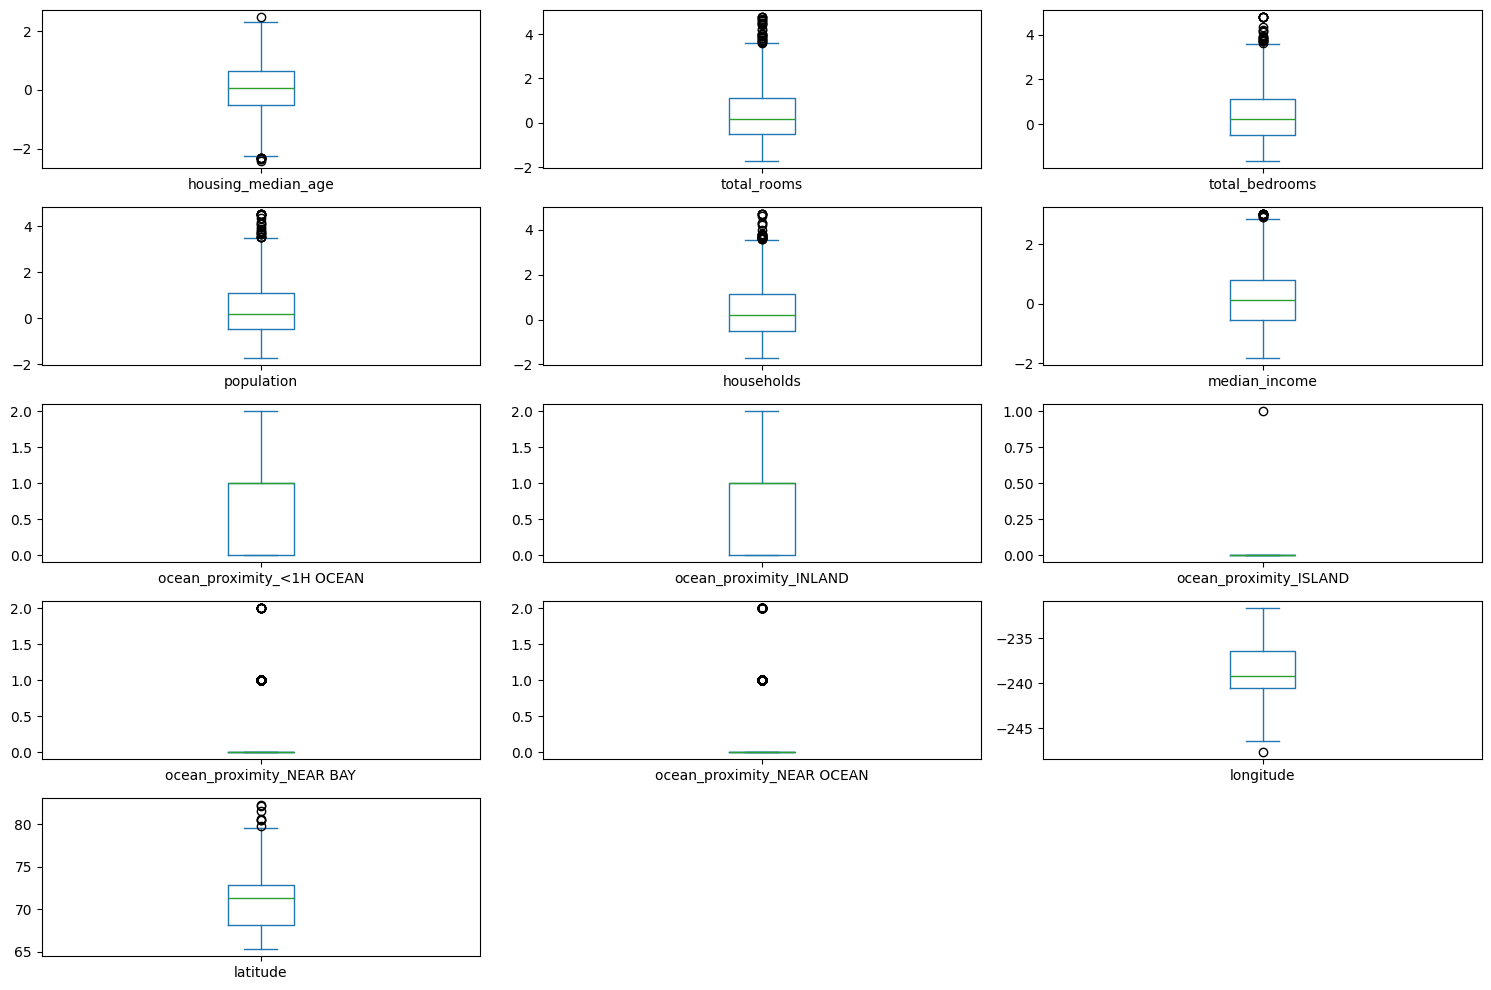

In [50]:
# Buat boxplot untuk setiap fitur
data.plot(kind='box', subplots=True, layout=(int(len(data.columns)/3)+1, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [51]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity']),
                                ('knn_imputer',
                                 Pipeline(steps=[('imputer', KNNImputer())]),
                                 ['longitude', 'latitude'])])

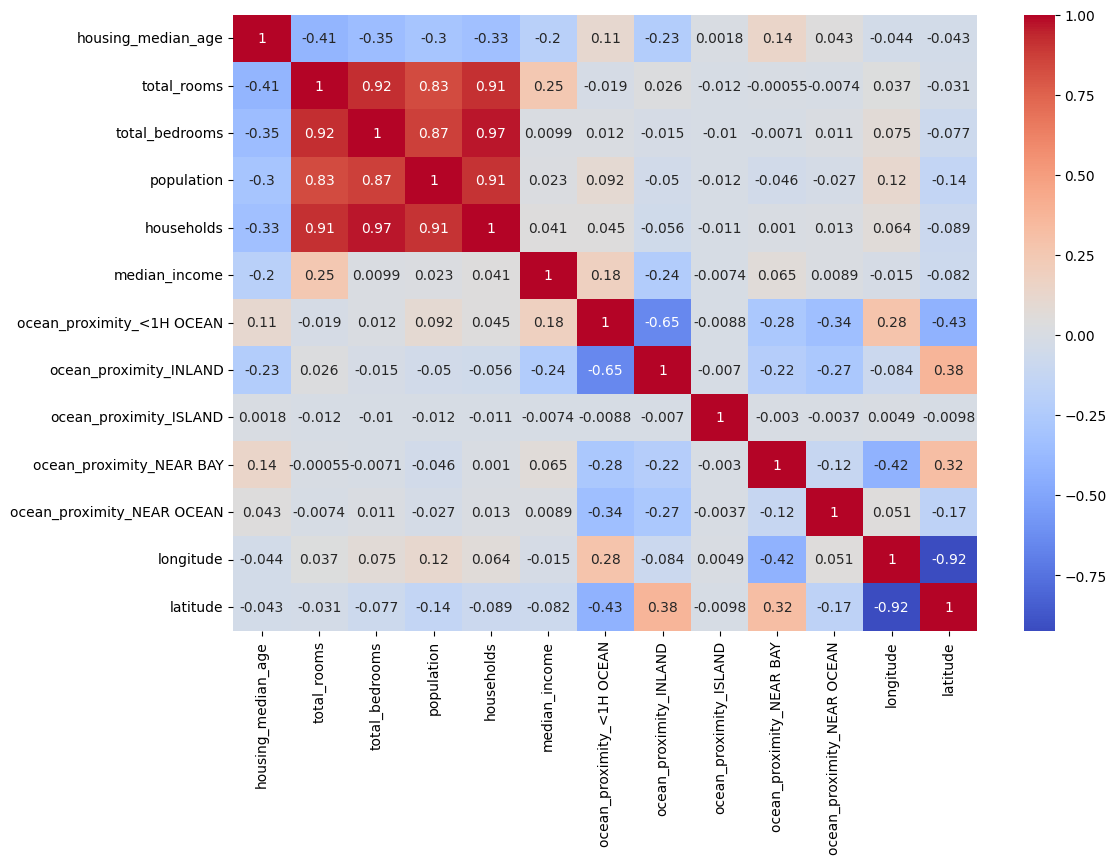

In [52]:
# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(X_train_preprocessed.corr(), annot=True, cmap='coolwarm')
plt.show()

> Model

In [53]:
import numpy as np
import pandas as pd
import psutil

# Model regresi
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Evaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import StratifiedKFold, cross_validate, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA

# Scorers
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, r2_score


In [54]:
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb_model = xgb.XGBRegressor(random_state=2020)
# baru
gbr = GradientBoostingRegressor(random_state=2020)
abr = AdaBoostRegressor(random_state=2020)

In [55]:

# Model dictionary
models = {
    "KNN": knn,
    "Decision Tree": tree,
    "Random Forest": rf,
    "XGBoost": xgb_model,
    "Gradient Boosting": gbr,
    "AdaBoost": abr
}

# Create custom scorers for MAE and R2
scorers = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE': make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Initialize results lists
model_name = []
mae_mean_value = []
mae_std_value = []
mape_mean_value = []
mape_std_value = []
r2_mean_value = []
r2_std_value = []

# Train and evaluate each model
for name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=2020)
    
    estimator = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])
    
    # Evaluate model with cross-validation for MAE and R2
    cv_results = cross_validate(
        estimator,
        X_train,
        y_train,
        cv=kf,
        scoring=scorers,
        error_score='raise',
        return_train_score=False
    )
    
    # Store results
    model_name.append(name)
    mae_mean_value.append(cv_results['test_MAE'].mean())
    mae_std_value.append(cv_results['test_MAE'].std())
    
    mape_mean_value.append(cv_results['test_MAPE'].mean())
    mape_std_value.append(cv_results['test_MAPE'].std())
    
    r2_mean_value.append(cv_results['test_R2'].mean())
    r2_std_value.append(cv_results['test_R2'].std())
    
    print(f"{name} - MAE: {cv_results['test_MAE']}, MAPE: {cv_results['test_MAPE']} ,R2: {cv_results['test_R2']}")


KNN - MAE: [36243.79817308 35612.76971154 36604.61596154 36258.88461538
 36772.65394231], MAPE: [0.20204433 0.20968395 0.207923   0.21458342 0.20239295] ,R2: [0.70234466 0.69544922 0.67724981 0.69562892 0.69770731]
Decision Tree - MAE: [41681.49038462 42146.10673077 44103.55817308 43134.51923077
 44549.95240385], MAPE: [0.23933102 0.24266626 0.25886892 0.25733725 0.25608693] ,R2: [0.5903015  0.56605378 0.49727321 0.55753916 0.50251299]
Random Forest - MAE: [31432.88557692 31128.38885096 33293.50726442 30794.48966827
 32168.37127885], MAPE: [0.18203488 0.18999248 0.19592274 0.19017503 0.18489593] ,R2: [0.77230899 0.76285095 0.73259091 0.77925967 0.76477329]
XGBoost - MAE: [30647.85721811 30135.33695162 31868.67343938 30371.26955942
 31525.18210261], MAPE: [0.17763562 0.18300388 0.18524674 0.1909854  0.17811868] ,R2: [0.78520224 0.77841301 0.74873077 0.78650006 0.76603955]
Gradient Boosting - MAE: [35523.66259504 33745.4225923  37096.34137986 35370.61722474
 35731.86781415], MAPE: [0.206

In [56]:
# Create benchmark_model_train DataFrame
benchmark_model = pd.DataFrame({
    'model': model_name,
    'mean_MAE': mae_mean_value,
    'std_MAE': mae_std_value,
    'mean_MAPE':mape_mean_value,
    'std_MAPE': mape_std_value,
    'mean_R2': r2_mean_value,
    'std_R2': r2_std_value
}).sort_values(by='mean_R2', ascending=False)

print(benchmark_model)

               model      mean_MAE      std_MAE  mean_MAPE  std_MAPE  \
3            XGBoost  30909.663854   671.796901   0.182998  0.004928   
2      Random Forest  31763.528528   889.550006   0.188604  0.004793   
4  Gradient Boosting  35493.582321  1067.492787   0.210777  0.006350   
0                KNN  36298.544481   398.325653   0.207326  0.004708   
1      Decision Tree  43123.125385  1098.188557   0.250858  0.008167   
5           AdaBoost  60902.981416  1627.609167   0.441466  0.015084   

    mean_R2    std_R2  
3  0.772977  0.014127  
2  0.762357  0.015980  
4  0.723828  0.017613  
0  0.693676  0.008581  
1  0.542736  0.036634  
5  0.416565  0.023996  


In [57]:
train_bfr_tunning = benchmark_model.iloc[:3]
train_bfr_tunning

,model,mean_MAE,std_MAE,mean_MAPE,std_MAPE,mean_R2,std_R2
3,XGBoost,30909.663854,671.796901,0.182998,0.004928,0.772977,0.014127
2,Random Forest,31763.528528,889.550006,0.188604,0.004793,0.762357,0.015980
4,Gradient Boosting,35493.582321,1067.492787,0.210777,0.006350,0.723828,0.017613


In [58]:
# Initialize results lists for test set evaluation
model_name = []
test_mape = []
test_r2 = []
test_mae = []

models = {
    "KNN": knn,
    "Decision Tree": tree,
    "Random Forest": rf,
    "XGBoost": xgb_model,
    "Gradient Boosting": gbr,
    "AdaBoost": abr
}

# Evaluate each model on the test set
for name, model in models.items():
    model_pipeline = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

    # Fit the model
    model_pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_test = model_pipeline.predict(X_test)
    
    # Evaluate
    mape = mean_absolute_percentage_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # Store results
    test_mape.append(mape)
    test_r2.append(r2)
    test_mae.append(mae)
    model_name.append(name)

In [59]:
benchmark_model_test = pd.DataFrame({
    'Model': model_name,
    'MAE': test_mae,
    'Test MAPE': test_mape,
    'Test R2': test_r2
}).sort_values(by='Test R2', ascending=False)

print(benchmark_model_test)

               Model           MAE  Test MAPE   Test R2
3            XGBoost  29459.037021   0.168895  0.795599
2      Random Forest  31038.589308   0.177254  0.766554
4  Gradient Boosting  35209.727692   0.201412  0.728239
0                KNN  35669.992692   0.198258  0.694573
1      Decision Tree  42005.847308   0.238932  0.562214
5           AdaBoost  59853.041259   0.425619  0.437938


In [60]:
test_bfr_tunning = benchmark_model_test.iloc[:3]
print(test_bfr_tunning)

               Model           MAE  Test MAPE   Test R2
3            XGBoost  29459.037021   0.168895  0.795599
2      Random Forest  31038.589308   0.177254  0.766554
4  Gradient Boosting  35209.727692   0.201412  0.728239


>  ## Hyperparameter tuning Random Forest

In [56]:
# Define custom scorers
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE' : make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}


# Cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=2020)
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Pipeline
estimator_rf = Pipeline([
    ('transformer', transformer),
    ('model', rf)
])

# GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=estimator_rf,
    param_grid=param_grid_rf,
    cv=kf,
    scoring=scoring,
    refit='R2', 
    n_jobs=-1,
    verbose=1
)

In [57]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          LogTransformer(columns=['housing_median_age',
                                                                                                                  'total_rooms',
                                                                                                                  'total_bedrooms',
                                                                                                                  'population',
                                                                                                                  'households',
                                                                                                                  'median_income',
                                                                                                                  'rooms_pe...
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             refit='R2',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')},
             verbose=1)

In [58]:
print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Best cross-validation score for Random Forest: {grid_search_rf.best_score_}')

Best parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Best cross-validation score for Random Forest: 0.7638499266042552


>  ## Hyperparameter tuning XGBoost

In [99]:
# Define custom scorers

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# Definisikan metrik
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE' : make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Define the model
xgb = XGBRegressor(random_state=2020)

# Define the hyperparameter grid
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__reg_alpha': [0, 0.1, 1],  
    'model__reg_lambda': [1, 1.5, 2]  
}

# Create the pipeline
estimator_xgb = Pipeline([
    ('transformer', transformer),
    ('model', xgb)
])

# Konfigurasi GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=estimator_xgb,
    param_grid=param_grid_xgb,
    cv=kf,
    scoring=scoring,
    refit='R2',  
    n_jobs=-1,
    verbose=1
)

In [100]:
# Fit the model
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          LogTransformer(columns=['housing_median_age',
                                                                                                                  'total_rooms',
                                                                                                                  'total_bedrooms',
                                                                                                                  'population',
                                                                                                                  'households',
                                                                                                                  'median_income',
                                                                                                                  'rooms_pe...
                         'model__n_estimators': [100, 200, 300],
                         'model__reg_alpha': [0, 0.1, 1],
                         'model__reg_lambda': [1, 1.5, 2],
                         'model__subsample': [0.8, 1.0]},
             refit='R2',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')},
             verbose=1)

In [101]:
# Print the best parameters and the best cross-validation score
print(f'Best parameters for XGBoost: {grid_search_xgb.best_params_}')
print(f'Best cross-validation score for XGBoost: {grid_search_xgb.best_score_}')

Best parameters for XGBoost: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1, 'model__subsample': 1.0}
Best cross-validation score for XGBoost: 0.8038854454284303


Random Size

In [90]:
# Define custom scorers
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE': make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# Define the model without early stopping here
xgb = XGBRegressor(random_state=2020)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid_xgb = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.15],
    'model__max_depth': [3, 5, 7, 9],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.05, 0.1, 0.5],  
    'model__reg_lambda': [0.5, 1, 1.5, 2],
    'model__min_child_weight': [1, 3, 5, 7],
    'model__gamma': [0, 0.1, 0.2, 0.3]
}

# Create the pipeline
estimator_xgb = Pipeline([
    ('transformer', transformer),
    ('model', xgb)
])

# Configure RandomizedSearchCV
randomized_search_xgb = RandomizedSearchCV(
    estimator=estimator_xgb,
    param_distributions=param_grid_xgb,
    n_iter=100,  # Set the number of iterations
    cv=kf,
    scoring=scoring,
    refit='R2',  
    n_jobs=-1,
    verbose=1,
    random_state=2020
)

In [92]:
# Fit the model
randomized_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('log_transform',
                                                                                                LogTransformer(columns=['housing_median_age',
                                                                                                                        'total_rooms',
                                                                                                                        'total_bedrooms',
                                                                                                                        'population',
                                                                                                                        'households',
                                                                                                                        'median_income',
                                                                                                                        'ro...
                                                                400],
                                        'model__reg_alpha': [0, 0.05, 0.1, 0.5],
                                        'model__reg_lambda': [0.5, 1, 1.5, 2],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=2020, refit='R2',
                   scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                            'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                            'R2': make_scorer(r2_score, response_method='predict')},
                   verbose=1)

In [93]:
# Print the best parameters and the best cross-validation score
print("Best parameters for XGBoost:", randomized_search_xgb.best_params_)
print("Best cross-validation score for XGBoost:", randomized_search_xgb.best_score_)

Best parameters for XGBoost: {'model__subsample': 0.8, 'model__reg_lambda': 1, 'model__reg_alpha': 0.05, 'model__n_estimators': 400, 'model__min_child_weight': 3, 'model__max_depth': 7, 'model__learning_rate': 0.05, 'model__gamma': 0.3, 'model__colsample_bytree': 0.6}
Best cross-validation score for XGBoost: 0.8068781051459233


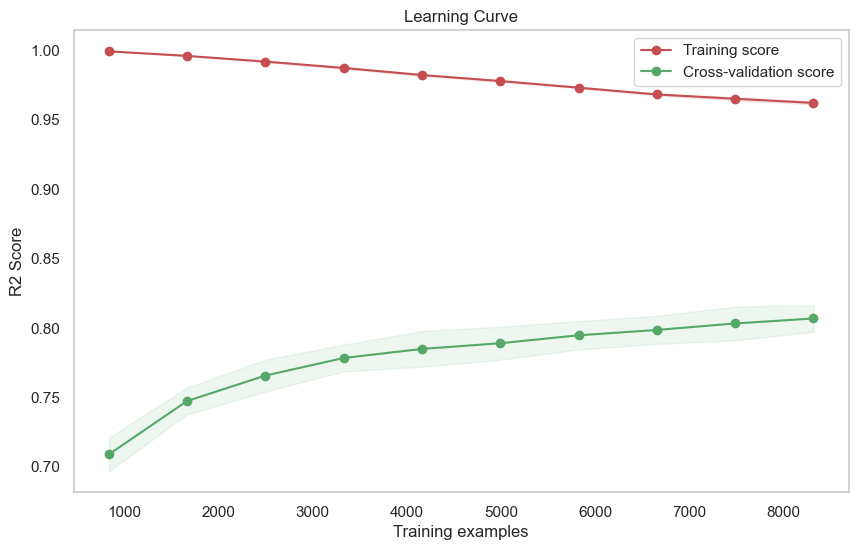

In [121]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    randomized_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=2020)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('R2 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

>  ## Hyperparameter tuning Gradient Bossting

In [62]:
# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# Definisikan metrik
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE' : make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Define the model
gbr = GradientBoostingRegressor(random_state=2020)

# Define the hyperparameter grid
param_grid_gbr = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0]
}

# Create the pipeline
estimator_gbr = Pipeline([
    ('transformer', transformer),
    ('model', gbr)
])

# Konfigurasi GridSearchCV
grid_search_gbr = GridSearchCV(
    estimator=estimator_gbr,
    param_grid=param_grid_gbr,
    cv=kf,
    scoring=scoring,
    refit='R2',  
    n_jobs=-1,
    verbose=1
)

In [63]:
# Fit the model
grid_search_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          LogTransformer(columns=['housing_median_age',
                                                                                                                  'total_rooms',
                                                                                                                  'total_bedrooms',
                                                                                                                  'population',
                                                                                                                  'households',
                                                                                                                  'median_income',
                                                                                                                  'rooms_pe...
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__subsample': [0.8, 1.0]},
             refit='R2',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')},
             verbose=1)

In [64]:
# Print the best parameters and the best cross-validation score
print(f'Best parameters for XGBoost: {grid_search_xgb.best_params_}')
print(f'Best cross-validation score for XGBoost: {grid_search_xgb.best_score_}')

Best parameters for XGBoost: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1, 'model__subsample': 1.0}
Best cross-validation score for XGBoost: 0.8038854454284303


> ## After Tunning

In [123]:
best_xgb = randomized_search_xgb.best_estimator_
best_rf = grid_search_rf.best_estimator_

In [95]:
best_gbr = grid_search_gbr.best_estimator_

In [96]:

# Model dictionary
models = {
    "Random Forest After Tuning": best_rf,
    "XGBoost After Tuning": best_xgb,
    "Gradien Boosting" : best_gbr
}

# Initialize results lists
model_name = []
mae = []
mape = []
r2 = []

memory_usage_list = []

# Train and evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    model_name.append(name)
    mae_score = mean_absolute_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)  # Rename the variable to avoid conflict
    mae.append(mae_score)
    mape.append(mape_score)
    r2.append(r2_score_value)

test_after_tuning = pd.DataFrame({
    'Model': model_name,
    'MAE': mae,
    'MAPE': mape,
    'R2': r2
})

print(test_after_tuning.sort_values(by='R2', ascending=False))


                        Model           MAE      MAPE        R2
1        XGBoost After Tuning  27230.666801  0.155917  0.817396
2            Gradien Boosting  28008.725992  0.159347  0.804779
0  Random Forest After Tuning  30305.607964  0.172141  0.773904


> # Model Peformance In Test

> ## After Tunning

In [104]:
display(test_bfr_tunning, test_after_tuning.sort_values(by='R2', ascending=False))

,Model,MAE,Test MAPE,Test R2
3,XGBoost,28630.200539,0.163764,0.801939
2,Random Forest,30560.173435,0.173752,0.771181
4,Gradient Boosting,33660.894872,0.194588,0.747783


,Model,MAE,MAPE,R2
1,XGBoost After Tuning,27230.666801,0.155917,0.817396
2,Gradien Boosting,28008.725992,0.159347,0.804779
0,Random Forest After Tuning,30305.607964,0.172141,0.773904


In [105]:
display(test_bfr_tunning, test_after_tuning.sort_values(by='R2', ascending=False))

,Model,MAE,Test MAPE,Test R2
3,XGBoost,28630.200539,0.163764,0.801939
2,Random Forest,30560.173435,0.173752,0.771181
4,Gradient Boosting,33660.894872,0.194588,0.747783


,Model,MAE,MAPE,R2
1,XGBoost After Tuning,27230.666801,0.155917,0.817396
2,Gradien Boosting,28008.725992,0.159347,0.804779
0,Random Forest After Tuning,30305.607964,0.172141,0.773904


> # Feature Importance

In [108]:
model_final = best_xgb

# predict
y_pred = model_final.predict(X_test)

In [109]:
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))
list_features

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 '_longitude',
 '_latitude']

In [110]:
# assign featire importance to variable
imp = model_final[-1].feature_importances_
imp

array([0.01718242, 0.01312991, 0.00990668, 0.01264792, 0.00968728,
       0.1435068 , 0.024231  , 0.03003171, 0.03002481, 0.5454095 ,
       0.        , 0.03999227, 0.05376805, 0.03839411, 0.03208754],
      dtype=float32)

In [111]:
# to dataframe
features_imp = pd.DataFrame({
    'Importance' : imp,
    "Feature" : list_features
}).sort_values(by='Importance', ascending=False)
features_imp

,Importance,Feature
9,0.545410,ocean_proximity_INLAND
5,0.143507,median_income
12,0.053768,ocean_proximity_NEAR OCEAN
11,0.039992,ocean_proximity_NEAR BAY
13,0.038394,_longitude
14,0.032088,_latitude
7,0.030032,population_per_household
8,0.030025,ocean_proximity_<1H OCEAN
6,0.024231,rooms_per_household
0,0.017182,housing_median_age


<Axes: xlabel='Importance', ylabel='Feature'>

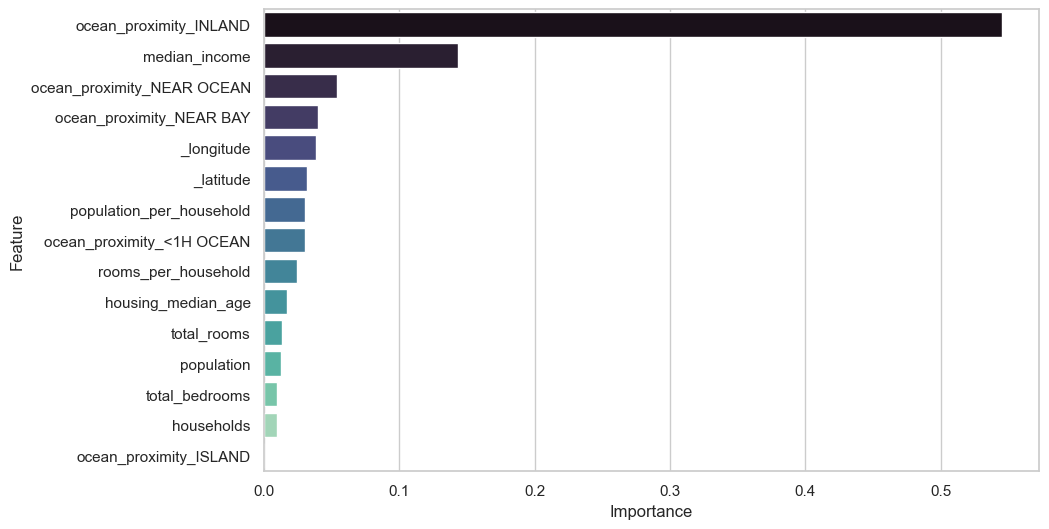

In [112]:
# visualization 
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=features_imp,x='Importance', y='Feature', orient='h', palette='mako')

# Explainable AI

In [113]:
import shap

In [114]:
model_final[1].predict

<bound method XGBModel.predict of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=2020, ...)>

In [115]:
# explainer 
explainer = shap.Explainer(
    model_final[1].predict,
    model_final[0].transform(X_test)
)

shap_values = explainer( model_final[0].transform(X_test))

PermutationExplainer explainer: 2601it [07:32,  5.63it/s]                          


In [116]:
X_test.iloc[0] 

longitude                     -118.36
latitude                        34.05
housing_median_age               42.0
total_rooms                    1372.0
total_bedrooms                  435.0
population                      674.0
households                      271.0
median_income                  2.8793
ocean_proximity             <1H OCEAN
rooms_per_household          5.062731
population_per_household     2.487085
Name: 10743, dtype: object

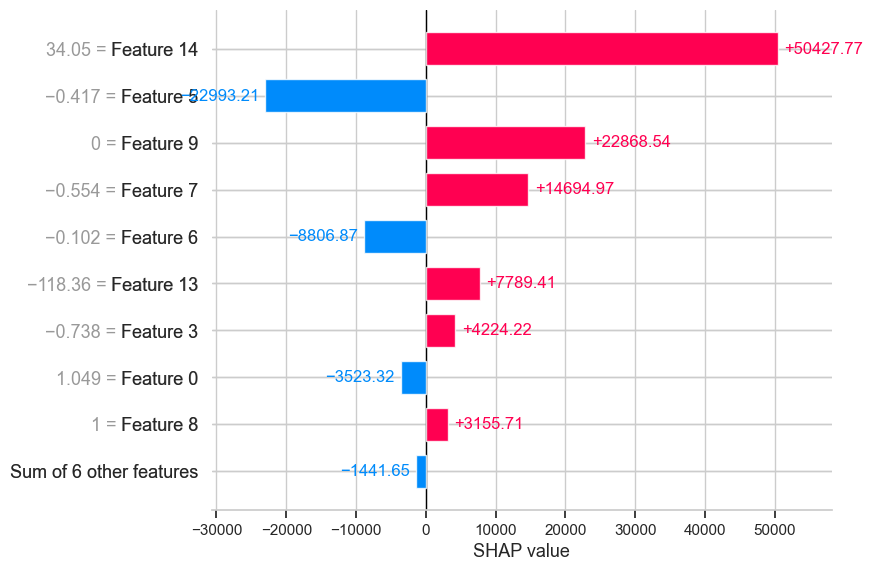

In [117]:
# shap_value for explain obvervation in test
shap.plots.bar(shap_values[0])

In [118]:
[i for i in enumerate(list_features)]

[(0, 'housing_median_age'),
 (1, 'total_rooms'),
 (2, 'total_bedrooms'),
 (3, 'population'),
 (4, 'households'),
 (5, 'median_income'),
 (6, 'rooms_per_household'),
 (7, 'population_per_household'),
 (8, 'ocean_proximity_<1H OCEAN'),
 (9, 'ocean_proximity_INLAND'),
 (10, 'ocean_proximity_ISLAND'),
 (11, 'ocean_proximity_NEAR BAY'),
 (12, 'ocean_proximity_NEAR OCEAN'),
 (13, '_longitude'),
 (14, '_latitude')]

In [83]:
# hap_value for explain all features in train
X_train_trans = model_final[0].transform(X_train)

# explainer
explainer = shap.TreeExplainer(
    model_final.named_steps['model'],
    data= X_train_trans,
    feature_perturbation='interventional',
    model_output='raw'
)

# shap values 
shap_values = explainer.shap_values(X_train_trans)

100%|===================| 10381/10400 [02:17<00:00]        

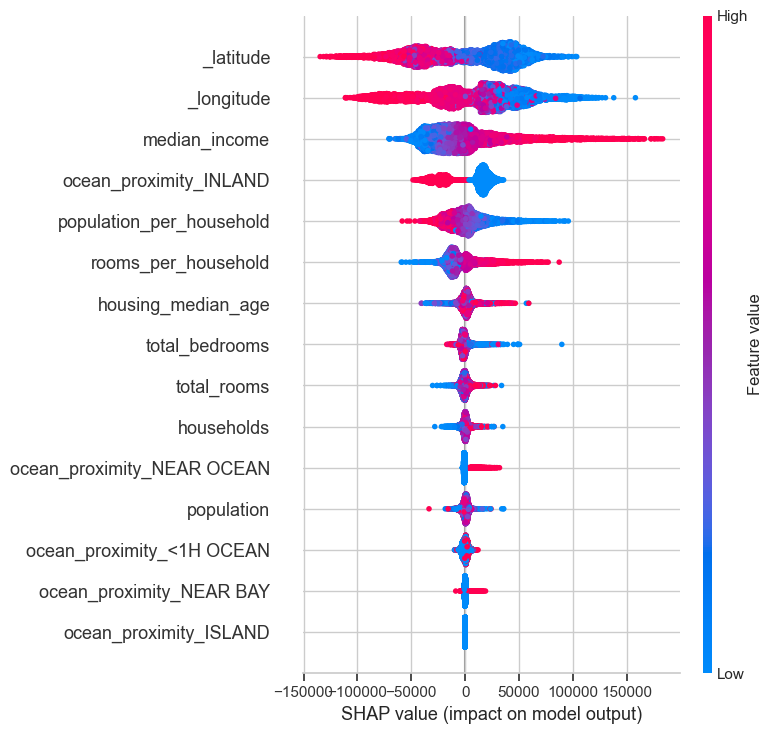

In [84]:
# summary plot for in train 
shap.summary_plot(
    shap_values,
    X_train_trans,
    feature_names=list_features  # perbaiki argumen di sini
)


In [85]:
# LIME
import lime
from lime import lime_tabular

In [86]:
# explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data = model_final[0].transform(X_train),
    feature_names = list_features,
    class_names = ['Not Buy', 'Buy'],
    mode = 'classification'
)
explainer


# Summary

Terdapat tren bahwa median harga rumah yang lebih mahal cenderung berada dekat pesisir pantai, sementara rumah semakin jauh dari pinggir pantai lebih murah.

Model terbaik adalah XGBoost. Setelah melatih beberapa model, XGBoost adalah model yang paling tinngi baik dibandingkan fitur lain.
setelah di lakukan hypeparameter tunning dapat dilihat bahwa performa model XGBoost : 

peforma sebelum tunning :
- MAE : 28630.200539
- MAPE : 0.163764	
- R2 : 0.801939

peforma setelah tunning :
- MAE : 27230.666801
- MAPE : 0.155917
- R2 : 0.817396

Metrik evaluasi yang digunakan pada model adalah nilai MAE, MAPE dan R2. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar 15%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga rumah di California, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 15% dari harga seharusnya. Nilai R2 0.817396 menunjukkan bahwa model Anda menjelaskan 81.7% variasi dalam data harga rumah California.

In [120]:
display(test_bfr_tunning, test_after_tuning.sort_values(by='R2', ascending=False))

,Model,MAE,Test MAPE,Test R2
3,XGBoost,28630.200539,0.163764,0.801939
2,Random Forest,30560.173435,0.173752,0.771181
4,Gradient Boosting,33660.894872,0.194588,0.747783


,Model,MAE,MAPE,R2
1,XGBoost After Tuning,27230.666801,0.155917,0.817396
2,Gradien Boosting,28008.725992,0.159347,0.804779
0,Random Forest After Tuning,30305.607964,0.172141,0.773904


# Rekomendasi

<body>

<h1>Analisis Pengaruh Lokasi Geografis terhadap Harga Properti</h1>
<p>Untuk pengembang properti atau agen real estate, penting untuk memperhatikan lokasi geografis dalam menentukan harga jual properti. Properti di dekat pesisir pantai biasanya memiliki nilai lebih tinggi, sementara properti di pedalaman cenderung memiliki harga yang lebih rendah. Faktor-faktor seperti pendapatan median di daerah dan aksesibilitas juga perlu dipertimbangkan dalam menetapkan harga jual properti.</p>
<p>Berdasarkan feature importance dan arah pengaruh dari fitur dapat disimpulkan:</p>

<h2>Arah Pengaruh Fitur terhadap Target</h2>
<p>Berdasarkan SHAP values yang dihasilkan untuk interpretasi, kita dapat melihat pengaruh positif atau negatif dari setiap fitur terhadap harga rumah. Berikut adalah interpretasi pengaruhnya:</p>

<ul>
    <li>
        <strong>latitude (_latitude):</strong>
        <span class="positive">Pengaruh Positif:</span> Nilai SHAP positif menunjukkan bahwa kenaikan nilai latitude (ke utara) memiliki pengaruh positif yang besar terhadap harga rumah, sekitar $50,427.77.
    </li>
    <li>
        <strong>longitude (_longitude):</strong>
        <span class="negative">Pengaruh Negatif:</span> Nilai SHAP negatif menunjukkan bahwa kenaikan nilai longitude (ke barat) memiliki pengaruh negatif yang cukup besar terhadap harga rumah, sekitar -$8,806.87.
    </li>
    <li>
        <strong>median_income:</strong>
        <span class="positive">Pengaruh Positif:</span> Kenaikan nilai median_income memiliki pengaruh positif signifikan terhadap harga rumah, sekitar $22,868.54.
    </li>
    <li>
        <strong>population_per_household:</strong>
        <span class="positive">Pengaruh Positif:</span> Nilai SHAP positif menunjukkan bahwa kenaikan nilai population_per_household memiliki pengaruh positif terhadap harga rumah, sekitar $14,894.97.
    </li>
    <li>
        <strong>rooms_per_household:</strong>
        <span class="negative">Pengaruh Negatif:</span> Nilai SHAP negatif menunjukkan bahwa kenaikan nilai rooms_per_household memiliki pengaruh negatif terhadap harga rumah, sekitar -$8,806.87.
    </li>
    <li>
        <strong>housing_median_age:</strong>
        <span class="negative">Pengaruh Negatif:</span> Nilai SHAP negatif menunjukkan bahwa kenaikan nilai housing_median_age memiliki pengaruh negatif terhadap harga rumah, sekitar -$3,523.32.
    </li>
    <li>
        <strong>total_bedrooms:</strong>
        <span class="negative">Pengaruh Negatif:</span> Nilai SHAP negatif menunjukkan bahwa kenaikan nilai total_bedrooms memiliki pengaruh negatif terhadap harga rumah, sekitar -$4,224.22.
    </li>
    <li>
        <strong>total_rooms:</strong>
        <span class="negative">Pengaruh Negatif:</span> Nilai SHAP negatif menunjukkan bahwa kenaikan nilai total_rooms memiliki pengaruh negatif terhadap harga rumah, sekitar -$1,441.65.
    </li>
    <li>
        <strong>ocean_proximity_<1H OCEAN:</strong>
        <span class="positive">Pengaruh Positif:</span> Kenaikan nilai fitur ini memiliki pengaruh positif terhadap harga rumah, sekitar $3,165.71.
    </li>
</ul>

</body>

In [132]:
# laod 
import pandas as pd
df_predict = pd.read_csv('test_data_housing.csv')

In [124]:
import pickle
best_xgb.fit(X, y)
pickle.dump(best_xgb,open('Final_Model.sav','wb'))

In [ ]:
import pickle
best_xgb.fit(X, y)
pickle.dump(best_xgb,open('Final_Model.sav','wb'))

In [ ]:
import pickle
best_xgb.fit(X, y)
pickle.dump(best_xgb,open('Final_Model.sav','wb'))

In [ ]:
filename = 'Final_Model.sav'
loaded_model = pickle.load(open(filename,'rb'))

In [ ]:
X = df.drop
y=

In [ ]:
# X

In [125]:
# y_pred_test = loaded_model.predict(X)

In [ ]:
# print('MAE', mean_absolute_error(y,y_pred_test ))
# print('MAPE', mean_absolute_percentage_error(y,y_pred_test ))
# print('MAE', r2_score(y,y_pred_test ))